<a href="https://colab.research.google.com/github/szostaklab/AI_PPP_Ribozyme/blob/main/pppLandscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
!pip install Levenshtein
from Levenshtein import distance as levenshtein_distance

def seqmatch(seq1, seq2):
  overall = 0
  overlap = 0
  for pos in range(len(seq1)):
    overall+=1
    if seq1[pos] == seq2[pos]:
      overlap+=1
  return overlap/overall

In [ ]:
rs1 = 'GAAUGCUGCCAACCGUGCGGGCUAAUUGGCAGACUGAGCU'.replace('U', 'T')

In [ ]:
#Collect all sequences into one list
all_seqs = []
for round in range(1,7):
  all_seqs.append(open('Round'+str(round)+'_Correct_BPS_g1counts.txt').readlines())

#Save clustering assignments and peak sequences in a list 
clustering = open('PPP_r6_clusters.csv').readlines()[1:]
peak_seqs = []
for cluster in range(1,11):
  for seq in clustering:
    if int(seq.split(',')[1])==cluster:
      peak_seqs.append(seq.split(',')[0])
      break

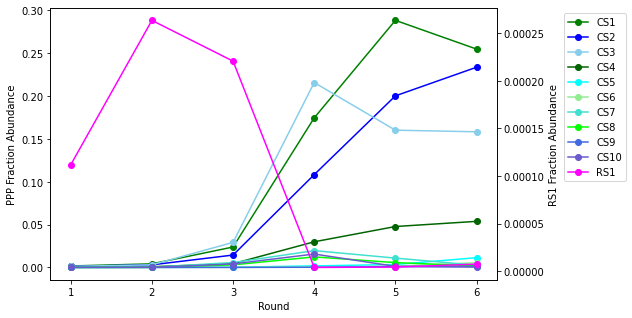

In [ ]:
#Count each peak in each round
all_peak_counts = []
for peak in peak_seqs:
  counts = []
  for round in range(len(all_seqs)):
    if peak+'\n' in all_seqs[round]:
      counts.append(int(all_seqs[round][all_seqs[round].index(peak+'\n')-1][1:]))
    else:
      counts.append(0)
  all_peak_counts.append(counts)
#Count RS1 in each round
all_rs1_counts = []
for round in range(len(all_seqs)):
  if rs1+'\n' in all_seqs[round]:
    all_rs1_counts.append(int(all_seqs[round][all_seqs[round].index(rs1+'\n')-1][1:]))
  else:
    all_rs1_counts.append(0)
#Find total counts
all_total_counts = []
for round in range(len(all_seqs)):
  total_counts = 0
  for count in all_seqs[round][::2]:
    total_counts+=(int(count[1:]))
  all_total_counts.append(total_counts)
#Plot the dynamics
palate = ['green', 'blue', 'skyblue', 'darkgreen', 'cyan', 'lightgreen', 'turquoise', 'lime', 'royalblue', 'slateblue']

fig, ax1 = plt.subplots(figsize = (8,5))

lns = []
ax2 = ax1.twinx()
counter = -1
for seq in all_peak_counts:
  counter+=1
  lns+= ax1.plot(range(1,7), np.array(seq)/np.array(all_total_counts), marker = 'o', color = palate[counter], label = 'CS'+str(1+all_peak_counts.index(seq)))
lns+= ax2.plot(range(1,7), np.array(all_rs1_counts)/np.array(all_total_counts), marker = 'o', color = 'magenta', label = 'RS1')

ax1.set_xlabel('Round')
ax1.set_ylabel('PPP Fraction Abundance')
ax2.set_ylabel('RS1 Fraction Abundance')

# added these three lines
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, bbox_to_anchor = (1.3,1))

plt.show()

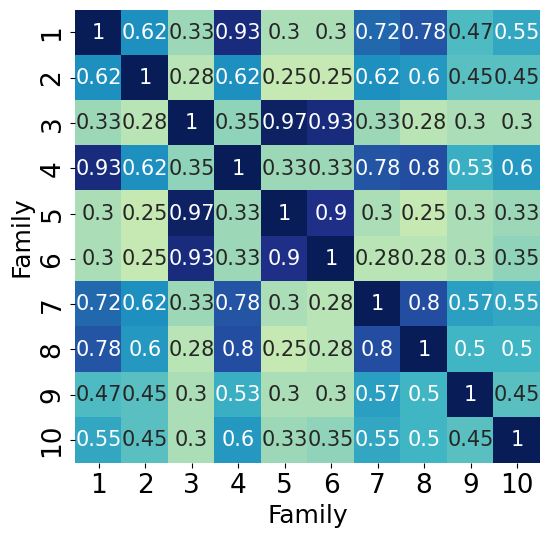

In [ ]:
all_overlap = []
for seq1 in peak_seqs:
  overlap = []
  for seq2 in peak_seqs:
    overlap.append(seqmatch(seq1, seq2))
  all_overlap.append(overlap)

yticklabels = list(range(1, 11))
xticklabels = list(range(1, 11))

fig = plt.figure(num=1, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')


ax = sns.heatmap(all_overlap, cbar=False, annot=True, annot_kws={"fontsize":15}, cmap="YlGnBu", yticklabels=yticklabels ,xticklabels=xticklabels,  vmin=0, vmax=1)
ax.set_ylabel('Family', fontsize=18)
ax.set_xlabel('Family', fontsize=18)
    
ax.tick_params(axis='both', which='major', labelsize=19)
ax.tick_params(axis='both', which='minor', labelsize=19)



In [ ]:
connected_counts = []
for seq in all_seqs[-1][1::2]:
  if seqmatch(seq.strip(), rs1)>.85:
    connected_counts.append(seq)
  else:
    for peak in peak_seqs:
      if seqmatch(seq.strip(), peak.strip())>.85:
        connected_counts.append(seq)
connected_counts = list(set(connected_counts))
print(len(connected_counts))

5924


In [ ]:
#Connection Matrix
connections = [ [ 0 for i in range(len(connected_counts)) ] for j in range(len(connected_counts)) ]
print(len(connected_counts))
for seq2 in range(len(connected_counts)):
  if seq2%100 == 0:
    print(seq2)
  for seq1 in range(len(connected_counts)):
    if int(seqmatch(connected_counts[seq1], connected_counts[seq2])*len(connected_counts[seq1])) == (len(connected_counts[seq1])-1):
      connections[seq1][seq2] = 1
connections_orig = connections


5924
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900


KeyboardInterrupt: ignored

In [ ]:
#Remove points with 0 connections
deleted = []
counter = -1
print(len(connections))
for row in connections:
  counter+=1
  if counter%100==0:
    print(counter)
  if sum(row) < 10:
    deleted.append(counter)
    np.delete(connections, counter, axis = 0)
    np.delete(connections, counter, axis = 1)

In [ ]:
label_locs = []
for peak in peak_seqs:
  peak_index = connected_counts.index(peak+'\n')
  label_locs.append(connections.index(connections_orig[peak_index]))

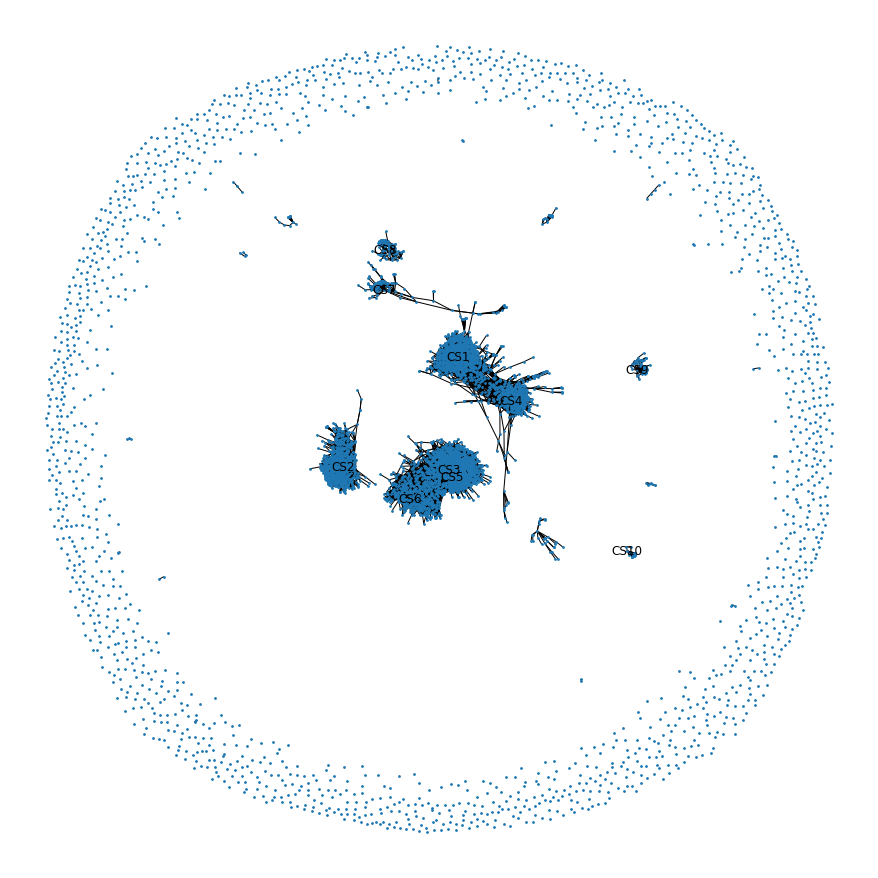

In [ ]:
G = nx.from_numpy_matrix(np.array(connections))  
plt.figure(figsize=(12,12)) 
labeldict = {}
for element in label_locs:
  labeldict[element] = 'CS'+str(1+label_locs.index(element))
nx.draw(G, node_size = 3, labels=labeldict, with_labels = True) 


In [ ]:
#https://www.geeksforgeeks.org/building-an-undirected-graph-and-finding-shortest-path-using-dictionaries-in-python/
# Python implementation to find the
# shortest path in the graph using
# dictionaries

# Function to find the shortest
# path between two nodes of a graph
def BFS_SP(graph, start, goal):
	explored = []
	
	# Queue for traversing the
	# graph in the BFS
	queue = [[start]]
	
	# If the desired node is
	# reached
	if start == goal:
		print("Same Node")
		return
	
	# Loop to traverse the graph
	# with the help of the queue
	while queue:
		path = queue.pop(0)
		node = path[-1]
		
		# Condition to check if the
		# current node is not visited
		if node not in explored:
			neighbours = graph[node]
			
			# Loop to iterate over the
			# neighbours of the node
			for neighbour in neighbours:
				new_path = list(path)
				new_path.append(neighbour)
				queue.append(new_path)
				
				# Condition to check if the
				# neighbour node is the goal
				if neighbour == goal:
					return new_path
			explored.append(node)

	# Condition when the nodes
	# are not connected
	return 0

In [ ]:
# Graph using dictionaries
start = 0
indices = [i for i, x in enumerate(connections[start]) if x == 1]
connections_dict = {start:indices}
start = 1
for start in range(1, len(connections)):
  indices = [i for i, x in enumerate(connections[start]) if x == 1]
  connections_dict[start]=indices

In [ ]:
#FIND ALL COMPLETE PATHS BTWN CS1-CS10
for peak_seq2 in peak_seqs:
  for peak_seq1 in peak_seqs:
    if peak_seq1!=peak_seq2:
      connnect = BFS_SP(connections_dict,connected_counts.index(peak_seq1+'\n'),connected_counts.index(peak_seq2+'\n'))
      if connnect!=0:
        print('CS'+str(1+peak_seqs.index(peak_seq1)), 'CS'+str(1+peak_seqs.index(peak_seq2)))
        print(connnect)

CS4 CS1
[2, 671, 4946, 3537]
CS5 CS3
[2372, 743]
CS6 CS3
[2402, 1252, 3157, 743]
CS1 CS4
[3537, 1631, 1587, 2]
CS3 CS5
[743, 2372]
CS6 CS5
[2402, 1252, 2358, 647, 2372]
CS3 CS6
[743, 2563, 4004, 2402]
CS5 CS6
[2372, 647, 2358, 1252, 2402]


In [ ]:
#FIND CLOSEST PATH FROM RS1 TO CS1
for cs in range(1,11):
  cs1_mutants = []
  for seq in connected_counts:
    if seqmatch(seq.strip(), peak_seqs[cs-1])>.65:
      cs1_mutants.append(seq)

  for cs1_mutant in cs1_mutants:
    connect = BFS_SP(connections_dict,connected_counts.index(rs1+'\n'),connected_counts.index(cs1_mutant.strip()+'\n'))
    if connect!=0:
      print('RS1 CS'+str(cs)+' '+str(seqmatch(peak_seqs[cs-1]+'\n', cs1_mutant.strip()+'\n')))

Same Node
RS1 CS1 0.6829268292682927
Shortest path =  1087 1443
RS1 CS1 0.6829268292682927
Shortest path =  1087 3972
RS1 CS1 0.6829268292682927
Shortest path =  1087 5074 4999
RS1 CS1 0.6829268292682927
Shortest path =  1087 5586
RS1 CS1 0.6829268292682927
Shortest path =  1087 146
RS1 CS4 0.7073170731707317
Shortest path =  1087 4743 5671 178
RS1 CS4 0.7073170731707317
Shortest path =  1087 5074 462
RS1 CS4 0.6829268292682927
Shortest path =  1087 1505 864
RS1 CS4 0.6829268292682927
Shortest path =  1087 1505 884
RS1 CS4 0.6829268292682927
Same Node
RS1 CS4 0.7317073170731707
Shortest path =  1087 1915 1220
RS1 CS4 0.6829268292682927
Shortest path =  1087 1443
RS1 CS4 0.7317073170731707
Shortest path =  1087 1505
RS1 CS4 0.7073170731707317
Shortest path =  1087 3972 1823 1643
RS1 CS4 0.7073170731707317
Shortest path =  1087 3972 1823
RS1 CS4 0.7073170731707317
Shortest path =  1087 1915
RS1 CS4 0.7073170731707317
Shortest path =  1087 2357 2173
RS1 CS4 0.7073170731707317
Shortest pat

In [ ]:
seqmatch('GACAGCGGAGAACTGAGTGGCCTAATTGGGAGAATGAGCT', rs1.strip())

0.725